In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [23]:
df = pd.read_csv('epa-sea-level.csv')

In [24]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [86]:
recent_year = df.loc[df['Year'] >= 2000, 'Year']
recent_sea_level = df.loc[df['Year'] >= 2000, 'CSIRO Adjusted Sea Level']

14

In [102]:
current_year = df['Year']
current_sea_level = df['CSIRO Adjusted Sea Level']

res = linregress(current_year, current_sea_level)
new_year = [i for i in range(1880, 2051)]
new_res = [res.intercept + res.slope * i for i in new_year]

recent_year = df.loc[df['Year'] >= 2000, 'Year']
recent_sea_level = df.loc[df['Year'] >= 2000, 'CSIRO Adjusted Sea Level']
recent_res = linregress(recent_year, recent_sea_level)

new_recent_year = [i for i in range(2000, 2051)]
new_recent_rest = [recent_res.intercept + recent_res.slope * i for i in new_recent_year]

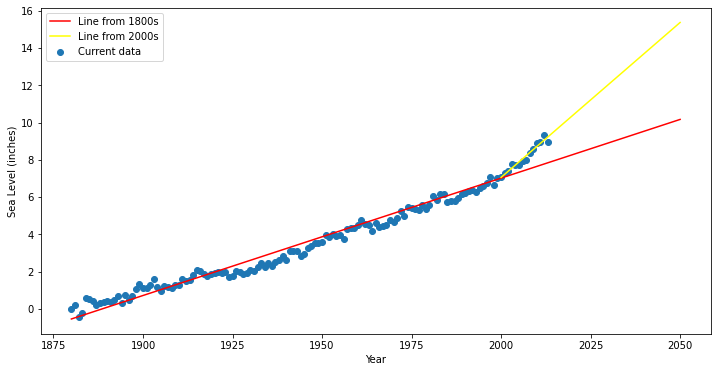

In [108]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(current_year, current_sea_level, label='Current data')
ax.plot(new_year, new_res, color='red', label='Line from 1800s')
ax.plot(new_recent_year, new_recent_rest, color='yellow', label='Line from 2000s')

ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')

ax.legend()